# INFO 523- PROJECT

## Customer Churn Insight: Predicting and Preventing Subscription Attrition

#### TEAM MEMBERS: Krisha Vardhni, Neha Chaudhari, Smit Shah

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("C:/INFO_523/Project/523-Project/customer.csv")

print(data.head())

   AccountAge  MonthlyCharges  TotalCharges SubscriptionType  \
0          20       11.055215    221.104302          Premium   
1          57        5.175208    294.986882            Basic   
2          73       12.106657    883.785952            Basic   
3          32        7.263743    232.439774            Basic   
4          57       16.953078    966.325422          Premium   

      PaymentMethod PaperlessBilling ContentType MultiDeviceAccess  \
0      Mailed check               No        Both                No   
1       Credit card              Yes      Movies                No   
2      Mailed check              Yes      Movies                No   
3  Electronic check               No    TV Shows                No   
4  Electronic check              Yes    TV Shows                No   

  DeviceRegistered  ViewingHoursPerWeek  ...  ContentDownloadsPerMonth  \
0           Mobile            36.758104  ...                        10   
1           Tablet            32.450568  ...  

In [4]:
print("\nColumns in the dataset:")
print(data.columns)


Columns in the dataset:
Index(['AccountAge', 'MonthlyCharges', 'TotalCharges', 'SubscriptionType',
       'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess',
       'DeviceRegistered', 'ViewingHoursPerWeek', 'AverageViewingDuration',
       'ContentDownloadsPerMonth', 'GenrePreference', 'UserRating',
       'SupportTicketsPerMonth', 'Gender', 'WatchlistSize', 'ParentalControl',
       'SubtitlesEnabled', 'CustomerID', 'Churn'],
      dtype='object')


In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())


Missing values in each column:
AccountAge                  0
MonthlyCharges              0
TotalCharges                0
SubscriptionType            0
PaymentMethod               0
PaperlessBilling            0
ContentType                 0
MultiDeviceAccess           0
DeviceRegistered            0
ViewingHoursPerWeek         0
AverageViewingDuration      0
ContentDownloadsPerMonth    0
GenrePreference             0
UserRating                  0
SupportTicketsPerMonth      0
Gender                      0
WatchlistSize               0
ParentalControl             0
SubtitlesEnabled            0
CustomerID                  0
Churn                       0
dtype: int64


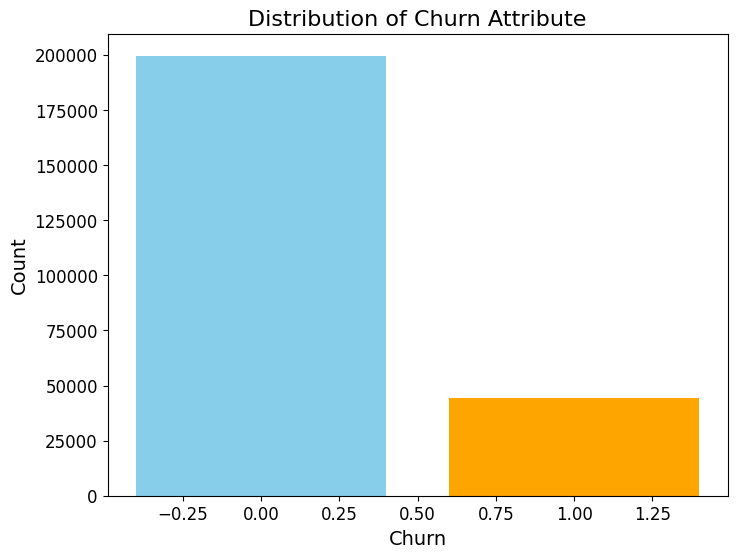

In [6]:
churn_counts = data['Churn'].value_counts()

# Plot the barplot
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Churn Attribute', fontsize=16)
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

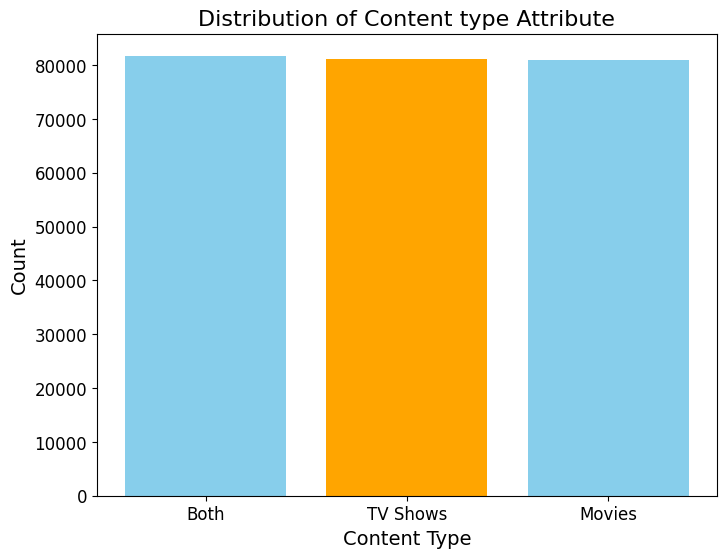

In [7]:
churn_counts = data['ContentType'].value_counts()

# Plot the barplot
plt.figure(figsize=(8, 6))
plt.bar(churn_counts.index, churn_counts.values, color=['skyblue', 'orange'])
plt.title('Distribution of Content type Attribute', fontsize=16)
plt.xlabel('Content Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

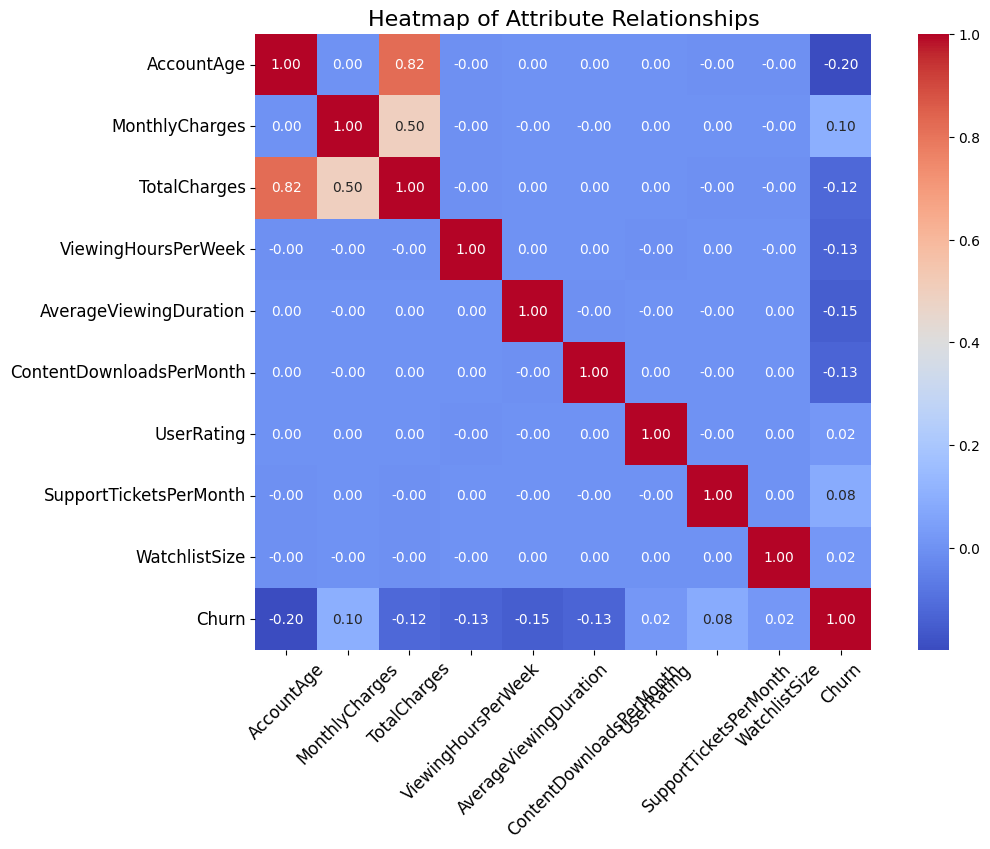

In [8]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check if numeric data is empty
if numeric_data.empty:
    print("No numerical columns found in the dataset.")
else:
    # Calculate the correlation matrix
    correlation_matrix = numeric_data.corr()

    # Plot the heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title('Heatmap of Attribute Relationships', fontsize=16)
    plt.xticks(fontsize=12, rotation=45)
    plt.yticks(fontsize=12)
    plt.show()

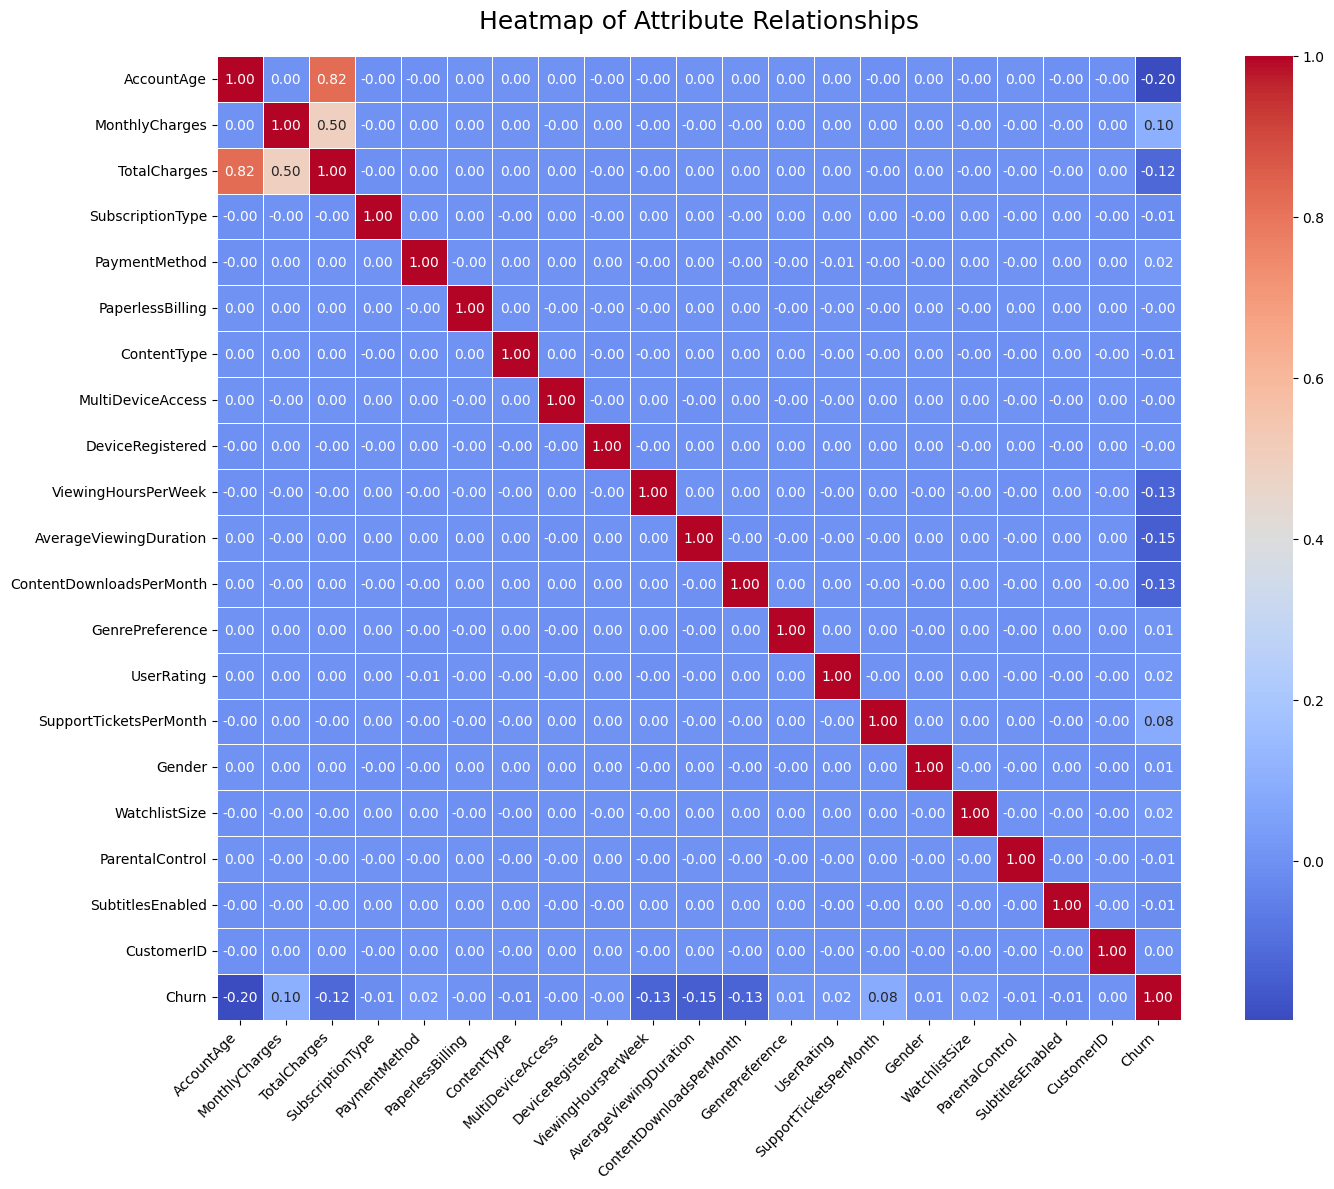

In [9]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
encoded_data = data.copy()
for col in data.select_dtypes(include=['object']).columns:
    encoded_data[col] = LabelEncoder().fit_transform(data[col])

correlation_matrix = encoded_data.corr()

# Plot the heatmap
plt.figure(figsize=(15, 12))  
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='coolwarm', 
    cbar=True, 
    square=True, 
    linewidths=0.5
)

plt.title('Heatmap of Attribute Relationships', fontsize=18, pad=20)
plt.xticks(fontsize=10, rotation=45, ha='right') 
plt.yticks(fontsize=10)
plt.tight_layout() 
plt.show()


## Question 1

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

# Focus only on retained customers
retained_customers = data[data['Churn'] == 0]  # Assuming 'Churn' column indicates customer status

# Select only the categorical attributes
attributes = ['SubscriptionType', 'PaymentMethod', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'ParentalControl']

# One-hot encode categorical attributes
encoded_data = pd.get_dummies(retained_customers[attributes])

# Filter out columns with low frequency (e.g., appearing in less than 1% of the data)
frequent_columns = encoded_data.columns[encoded_data.sum() > len(encoded_data) * 0.01]
filtered_data = encoded_data[frequent_columns]

# Apply Apriori to find frequent itemsets
frequent_itemsets = apriori(filtered_data, min_support=0.05, use_colnames=True)

# Calculate the total number of frequent itemsets
num_itemsets = frequent_itemsets['itemsets'].count()
print(num_itemsets)
# Generate association rules
rules = association_rules(frequent_itemsets, num_itemsets=num_itemsets, metric="lift", min_threshold=1.0)

# Sort rules by lift for insights
rules = rules.sort_values(by='lift', ascending=False)

# Display the top 10 rules
top_10_rules = rules.head(10)
print("Top 10 Association Rules:")
print(top_10_rules)


243
                          antecedents  \
29       (PaymentMethod_Mailed check)   
28        (SubscriptionType_Standard)   
57        (PaymentMethod_Credit card)   
56          (DeviceRegistered_Mobile)   
304  (PaymentMethod_Electronic check)   

                                     consequents  antecedent support  \
29                   (SubscriptionType_Standard)            0.246266   
28                  (PaymentMethod_Mailed check)            0.334766   
57                     (DeviceRegistered_Mobile)            0.255700   
56                   (PaymentMethod_Credit card)            0.249518   
304  (MultiDeviceAccess_Yes, ParentalControl_No)            0.248050   

     consequent support   support  confidence      lift  representativity  \
29             0.334766  0.083981    0.341016  1.018670               1.0   
28             0.246266  0.083981    0.250864  1.018670               1.0   
57             0.249518  0.064868    0.253688  1.016714               1.0   
56      